# Übung 1: K-NN - Rainier Robles & Valentin Wolf

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
train = pd.read_table('zip.train', delim_whitespace=True,header=None)
test = pd.read_table('zip.test', delim_whitespace=True,header=None)

In [63]:
train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0


(-0.5, 15.5, 15.5, -0.5)

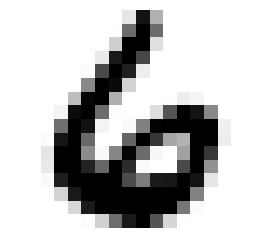

In [64]:
img = train.as_matrix()[0,1:].reshape(16,16)
im = plt.imshow(img, cmap='Greys')
plt.axis('off')

In [65]:
#split labels y from data X
y_train = train[0]
y_test = test[0]
X_train = train.drop(0, axis=1)
X_test = test.drop(0, axis=1)

In [67]:
#Classifier Object
class KNearestNeigbour(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        """stores the data and the labels no real training"""
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, k=1):
        """looks for the most common label in the k nearest datapoint from X_train
            if no majority it takes the one with the closest dist"""
        num_test = X.shape[0]
        dists = self.compute_distances_vectorized(X)
            
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = np.argpartition(dists[i],k)[:k]#np.argsort(dists[i])[:k]
            closest_labels = self.y_train[closest_y]
            #Finds all unique elements and their positions
            unique,pos = np.unique(closest_labels,return_inverse=True) 
            #Count the number of each unique element
            counts = np.bincount(pos)                     
            prediction = unique[np.argmax(counts)]

            y_pred[i] = prediction
        return y_pred
    
    def compute_distances(self,X):
        """computes the l2 distance from each data point in X to each in X_train"""
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            test_dist = np.sqrt(np.sum(np.square(self.X_train - X[i]), axis=1))
            dists[i, :] = test_dist
            
        return dists
    
    def compute_distances_vectorized(self,X):
        """computes the l2 distance from each data point in X to each in X_train"""
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        test2 = np.sum(X**2,axis=1).reshape(num_test,1)
        train2 = np.sum(self.X_train**2,axis=1).reshape(1,num_train)
        te_x_tr = np.dot(X,self.X_train.T)
        dists = test2 - 2*(te_x_tr) + train2
        return dists

    
def calc_error_rate(truth, pred):
    """gets two vectors, returns (correct classified / total classified)"""
    amount = truth.shape[0]
    wrong = np.count_nonzero(truth - pred)
    return wrong/amount

In [68]:
#lets train
knn = KNearestNeigbour()
knn.train(X_train.as_matrix(),y_train.as_matrix())

In [70]:
#let's predict with different k's
for k in range(1,10):
    y_pred = knn.predict(X_test.as_matrix(), k=k)
    print("k =",k,"| error rate: ", round(calc_error_rate(y_test.as_matrix(),y_pred),5))

k = 1 | error rate:  0.0563
k = 2 | error rate:  0.05879
k = 3 | error rate:  0.05531
k = 4 | error rate:  0.0568
k = 5 | error rate:  0.05531
k = 6 | error rate:  0.06129
k = 7 | error rate:  0.0583
k = 8 | error rate:  0.05929
k = 9 | error rate:  0.06278


In [71]:
def confused_matrix(x,y,percentage=False):
    assert(x.shape == y.shape)
    num_entries = x.shape[0]
    matrix = np.zeros((10,10))
    for i in range(num_entries):
        matrix[int(x[i]),int(y[i])] += 1
    if percentage==True: 
        matrix /= np.sum(matrix,axis=1)
    return matrix

In [72]:
#k=1
y_pred = knn.predict(X_test.as_matrix(), k=1)
x = confused_matrix(y_test.as_matrix(),y_pred)
x.astype('uint16')

array([[355,   0,   2,   0,   0,   0,   0,   1,   0,   1],
       [  0, 255,   0,   0,   6,   0,   2,   1,   0,   0],
       [  6,   1, 183,   2,   1,   0,   0,   2,   3,   0],
       [  3,   0,   2, 154,   0,   5,   0,   0,   0,   2],
       [  0,   3,   1,   0, 182,   1,   2,   2,   1,   8],
       [  2,   1,   2,   4,   0, 145,   2,   0,   3,   1],
       [  0,   0,   1,   0,   2,   3, 164,   0,   0,   0],
       [  0,   1,   1,   1,   4,   0,   0, 139,   0,   1],
       [  5,   0,   1,   6,   1,   1,   0,   1, 148,   3],
       [  0,   0,   1,   0,   2,   0,   0,   4,   1, 169]], dtype=uint16)

k = 1 | Total error rate:  0.0563


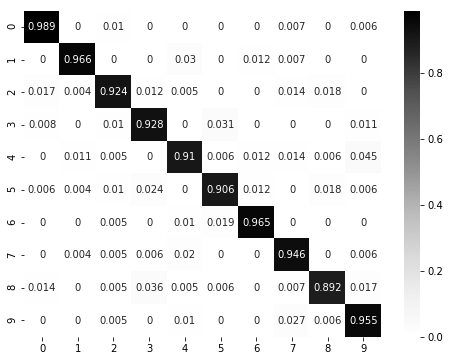

In [73]:
x = confused_matrix(y_test.as_matrix(),y_pred,percentage=True)
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax,data=np.round(x,3), annot=True, fmt="g", cmap='Greys')

print("k =",1,"| Total error rate: ", round(calc_error_rate(y_test.as_matrix(),y_pred),5))

In [74]:
k=2
y_pred = knn.predict(X_test.as_matrix(), k=k)
x = confused_matrix(y_test.as_matrix(),y_pred)
x.astype('uint16')

array([[355,   0,   3,   0,   0,   0,   0,   0,   0,   1],
       [  0, 259,   0,   0,   3,   0,   1,   1,   0,   0],
       [ 10,   1, 181,   1,   2,   0,   0,   2,   1,   0],
       [  3,   0,   2, 156,   0,   4,   0,   0,   0,   1],
       [  0,   3,   4,   0, 185,   1,   2,   3,   0,   2],
       [  4,   1,   2,   8,   0, 143,   0,   0,   1,   1],
       [  4,   0,   1,   0,   2,   2, 161,   0,   0,   0],
       [  0,   2,   1,   1,   4,   0,   0, 139,   0,   0],
       [  6,   0,   3,   5,   1,   1,   1,   1, 146,   2],
       [  1,   1,   1,   0,   5,   1,   0,   4,   0, 164]], dtype=uint16)

k = 2 | Total error rate:  0.05879


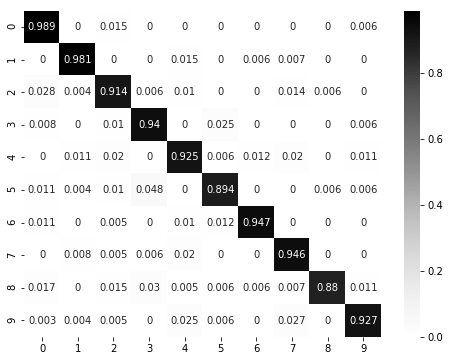

In [75]:
x = confused_matrix(y_test.as_matrix(),y_pred,percentage=True)
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax,data=np.round(x,3), annot=True, fmt="g", cmap='Greys')

print("k =",k,"| Total error rate: ", round(calc_error_rate(y_test.as_matrix(),y_pred),5))

In [76]:
k=3
y_pred = knn.predict(X_test.as_matrix(), k=k)
x = confused_matrix(y_test.as_matrix(),y_pred)
x.astype('uint16')


array([[355,   0,   3,   0,   0,   0,   0,   0,   0,   1],
       [  0, 258,   0,   0,   3,   0,   2,   1,   0,   0],
       [  8,   0, 183,   1,   1,   0,   0,   2,   3,   0],
       [  3,   0,   2, 153,   0,   6,   0,   1,   0,   1],
       [  0,   2,   0,   0, 183,   2,   2,   2,   1,   8],
       [  5,   0,   3,   3,   0, 144,   0,   0,   1,   4],
       [  3,   1,   1,   0,   2,   0, 163,   0,   0,   0],
       [  0,   1,   1,   1,   4,   0,   0, 138,   1,   1],
       [  4,   0,   3,   4,   0,   1,   0,   1, 151,   2],
       [  2,   0,   0,   0,   3,   0,   0,   4,   0, 168]], dtype=uint16)

k = 3 | Total error rate:  0.05531


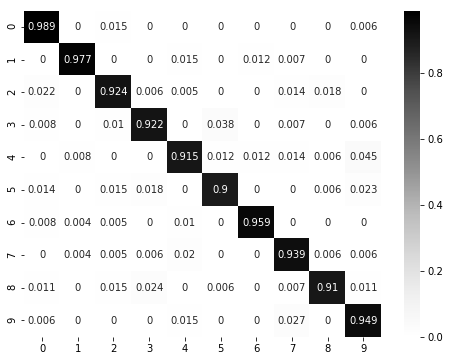

In [77]:
x = confused_matrix(y_test.as_matrix(),y_pred,percentage=True)
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax,data=np.round(x,3), annot=True, fmt="g", cmap='Greys')

print("k =",k,"| Total error rate: ", round(calc_error_rate(y_test.as_matrix(),y_pred),5))